In [16]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Carregamento do Dataset

In [2]:
# Importa a biblioteca pandas com o alias pd
import pandas as pd

# Lê o conjunto de dados de avaliação de carros de um arquivo usando a função read_fwf() do pandas.
# O argumento "../Data/wine/wine.data" indica o caminho do arquivo de dados.
# O parâmetro header=None especifica que o arquivo não possui uma linha de cabeçalho.
df = pd.read_fwf("../Data/wine/wine.data", header=None)

# Divide os valores na primeira coluna do DataFrame df (que contém todas as linhas do arquivo lido)
# com base na vírgula como delimitador.
# O método str.split() divide cada valor da primeira coluna em uma lista de strings,
# e o parâmetro expand=True expande essa lista de strings em colunas separadas.
df = df[0].str.split(',', expand=True)

# Renomeia as colunas do DataFrame para 'buying' (compra), 'maint' (manutenção), 'doors' (portas),
# 'persons' (pessoas), 'lug_boot' (porta-malas), 'safety' (segurança) e 'class' (classe).
# Esses são os nomes das características dos veículos no conjunto de dados, conforme fornecido 
# pelo arquivo car.c45-names
df.columns = ['Classe', 'Teor Alcoólico', 'Ácido Málico', 'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio',
           'Fenóis Totais', 'Flavonoides', 'Fenóis não Flavonoides', 'Proantocianidinas',
           'Intensidade de Cor', 'Tonalidade', 'Absorbância Óptica (OD280/OD315) de Vinhos Diluídos', 'Proline']

# Exibe as primeiras linhas do DataFrame, permitindo visualizar as colunas e os dados carregados.
df.head()


,Classe,Teor Alcoólico,Ácido Málico,Cinzas,Alcalinidade das Cinzas,Magnésio,Fenóis Totais,Flavonoides,Fenóis não Flavonoides,Proantocianidinas,Intensidade de Cor,Tonalidade,Absorbância Óptica (OD280/OD315) de Vinhos Diluídos,Proline
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
2,1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
4,1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735


In [13]:
tipos_de_dados = {
    'Classe': int,
    'Teor Alcoólico': float,
    'Ácido Málico': float,
    'Cinzas': float,
    'Alcalinidade das Cinzas': float,
    'Magnésio': int,
    'Fenóis Totais': float,
    'Flavonoides': float,
    'Fenóis não Flavonoides': float,
    'Proantocianidinas': float,
    'Intensidade de Cor': float,
    'Tonalidade': float,
    'Absorbância Óptica (OD280/OD315) de Vinhos Diluídos': float,
    'Proline': int
}

for col in tipos_de_dados:
    df[col] = df[col].astype(tipos_de_dados[col])
    
df.dtypes

Classe                                                   int32
Teor Alcoólico                                         float64
Ácido Málico                                           float64
Cinzas                                                 float64
Alcalinidade das Cinzas                                float64
Magnésio                                                 int32
Fenóis Totais                                          float64
Flavonoides                                            float64
Fenóis não Flavonoides                                 float64
Proantocianidinas                                      float64
Intensidade de Cor                                     float64
Tonalidade                                             float64
Absorbância Óptica (OD280/OD315) de Vinhos Diluídos    float64
Proline                                                  int32
Componente Principal 1                                 float64
Componente Principal 2                                 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Teor Alcoólico,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Ácido Málico,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Cinzas,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinidade das Cinzas,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnésio,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Fenóis Totais,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavonoides,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Fenóis não Flavonoides,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proantocianidinas,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Intensidade de Cor,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


# Análises Multivariadas

### Matriz de Correlações

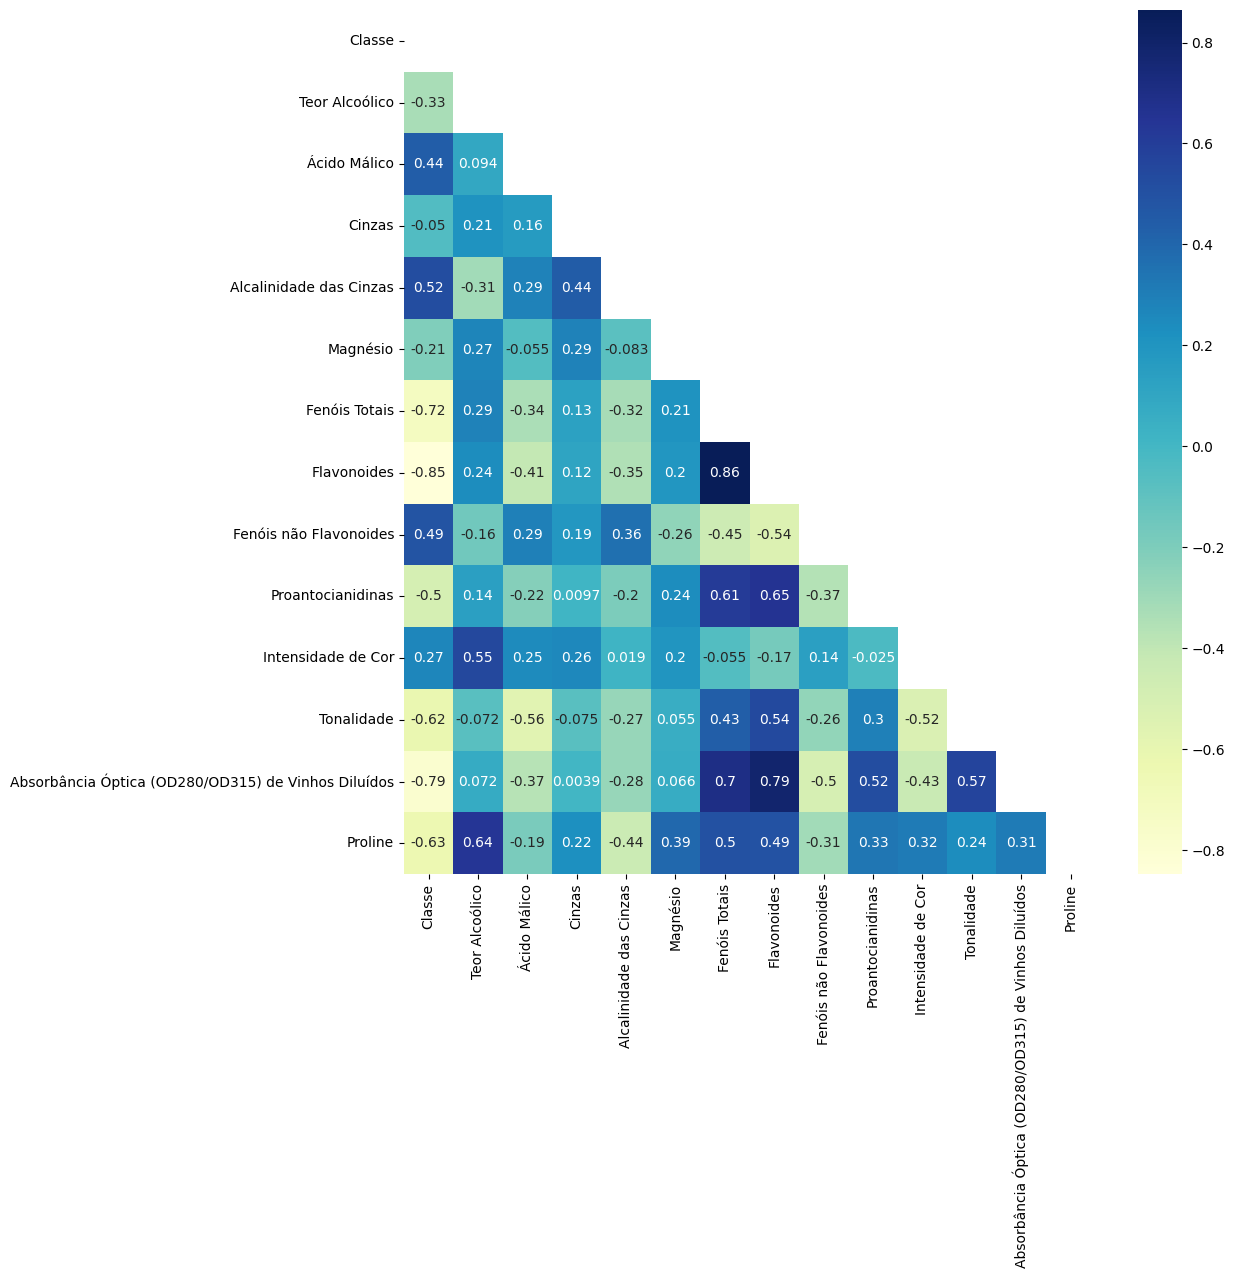

In [5]:
mask = np.triu(np.ones_like(df.corr()))
fig = plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.tight_layout()
fig.set_size_inches(15,15)
plt.show()

Conseguimos notar algumas correlações bastante fortes entre as variáveis:  
1) Flavonóides x Fenóis Totais (0.86)  
2) Flavonóides x Absorbância Óptica (0.79)  
3) Classe x Absorbância Óptica (-0.79)  
E, conseuqnetemnte:  
4) Flavonóides x Classe (-0.85)  

### K-Means

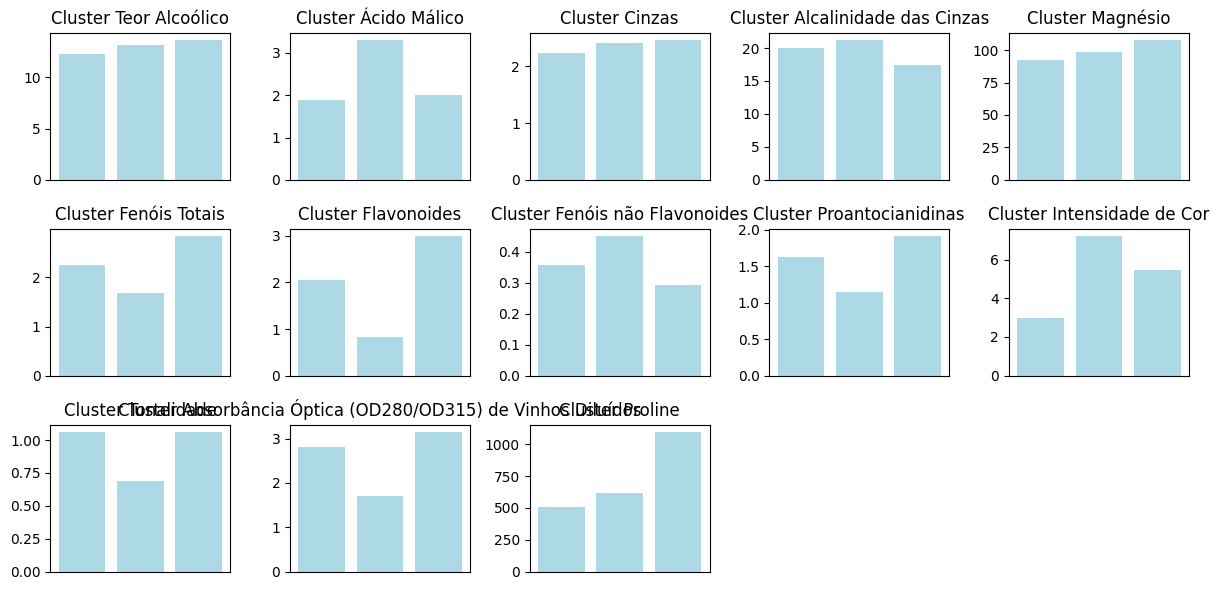

In [17]:
# Seleciona apenas as colunas numéricas para a análise de clustering
dados_para_clustering = df[['Teor Alcoólico', 'Ácido Málico', 'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio',
                            'Fenóis Totais', 'Flavonoides', 'Fenóis não Flavonoides', 'Proantocianidinas',
                            'Intensidade de Cor', 'Tonalidade', 'Absorbância Óptica (OD280/OD315) de Vinhos Diluídos', 'Proline']]

# Normaliza os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_para_clustering)

# Escolhe o número de clusters (grupos)
num_clusters = 3

# Aplica o algoritmo de K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(dados_normalizados)

# Adiciona os rótulos dos clusters ao DataFrame original
df['Cluster'] = kmeans.labels_

# Visualiza os centroides dos clusters
centroides = scaler.inverse_transform(kmeans.cluster_centers_)
centroides_df = pd.DataFrame(centroides, columns=dados_para_clustering.columns)

# Plota os centroides dos clusters
plt.figure(figsize=(12, 6))
for i, coluna in enumerate(dados_para_clustering.columns):
    plt.subplot(3, 5, i+1)
    plt.bar(range(num_clusters), centroides_df[coluna], color='lightblue')
    plt.title(f'Cluster {coluna}')
    plt.xticks([])
plt.tight_layout()
plt.show()

In [19]:
centroides_df

,Teor Alcoólico,Ácido Málico,Cinzas,Alcalinidade das Cinzas,Magnésio,Fenóis Totais,Flavonoides,Fenóis não Flavonoides,Proantocianidinas,Intensidade de Cor,Tonalidade,Absorbância Óptica (OD280/OD315) de Vinhos Diluídos,Proline
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


A análise de kmeans demonstra onde estão os centros teóricos de cada uma das classes se encontram, permitindo que se preveja a classe de um novo componente usando seus dados.

### PCA

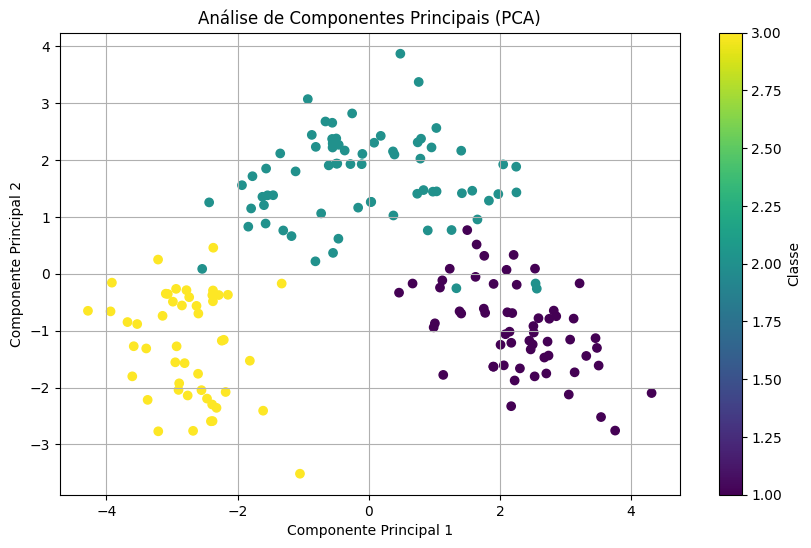

In [18]:
# Seleciona apenas as colunas numéricas para a análise de PCA
dados_para_pca = df[['Teor Alcoólico', 'Ácido Málico', 'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio',
                     'Fenóis Totais', 'Flavonoides', 'Fenóis não Flavonoides', 'Proantocianidinas',
                     'Intensidade de Cor', 'Tonalidade', 'Absorbância Óptica (OD280/OD315) de Vinhos Diluídos', 'Proline']]

# Normaliza os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_para_pca)

# Aplica o PCA
pca = PCA(n_components=2)
componentes_principais = pca.fit_transform(dados_normalizados)

# Adiciona os componentes principais ao DataFrame original
df['Componente Principal 1'] = componentes_principais[:, 0]
df['Componente Principal 2'] = componentes_principais[:, 1]

# Plota os dados com base nos componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(df['Componente Principal 1'], df['Componente Principal 2'], c=df['Classe'], cmap='viridis')
plt.title('Análise de Componentes Principais (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Classe')
plt.grid(True)
plt.show()

Utilizando PCA, com apenas dois componentes é possível realizar uma separação das classes, com poucas excessões  (pontos misturados)